### Importação dos dados



In [65]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [66]:
import pandas as pd

# Criando um dicionário com os faturamentos
faturamento = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

# Criando o DataFrame
df_faturamento = pd.DataFrame.from_dict(faturamento, orient='index', columns=['Faturamento Total'])

# Formatando no padrão brasileiro
df_faturamento['Faturamento Total'] = df_faturamento['Faturamento Total'].apply(
    lambda x: f"R$ {x:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.')
)

# Exibindo a tabela final
print(df_faturamento)


       Faturamento Total
Loja 1   R$ 1.534.509,12
Loja 2   R$ 1.488.459,06
Loja 3   R$ 1.464.025,03
Loja 4   R$ 1.384.497,58


# 2. Vendas por Categoria


In [67]:
import pandas as pd
# Criando um dicionário com os faturamentos
categoria_de_produto = {
    'Loja 1': loja['Categoria do Produto'].value_counts().idxmax(),
    'Loja 2': loja2['Categoria do Produto'].value_counts().idxmax(),
    'Loja 3': loja3['Categoria do Produto'].value_counts().idxmax(),
    'Loja 4': loja4['Categoria do Produto'].value_counts().idxmax()
}

df_categoria_de_produto= pd.DataFrame.from_dict(categoria_de_produto, orient='index', columns=['Categoria mais Popular'])

print(df_categoria_de_produto)

       Categoria mais Popular
Loja 1                 moveis
Loja 2                 moveis
Loja 3                 moveis
Loja 4                 moveis


# 3. Média de Avaliação das Lojas

In [68]:
import pandas as pd

Media_aval = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

df_media_aval= pd.DataFrame.from_dict(Media_aval, orient='index', columns=['Média de Avaliação'])

df_media_aval['Média de Avaliação'] = df_media_aval['Média de Avaliação'].apply(
    lambda x: f"{x:.2f}".replace('.', ',')
)

# Exibindo a tabela final
print(df_media_aval)

       Média de Avaliação
Loja 1               3,98
Loja 2               4,04
Loja 3               4,05
Loja 4               4,00


# 4. Produtos Mais e Menos Vendidos

In [69]:
import pandas as pd

# Função auxiliar para extrair os dados de cada loja
def extrair_metricas(loja_df):

    # Produto mais vendido
    produto_mais_vendido = loja_df['Produto'].value_counts().idxmax()

    # Produto menos vendido
    produto_menos_vendido = loja_df['Produto'].value_counts().idxmin()

    return produto_mais_vendido, produto_menos_vendido

# Coletando os dados para cada loja
lojas = {
    'Loja 1': extrair_metricas(loja),
    'Loja 2': extrair_metricas(loja2),
    'Loja 3': extrair_metricas(loja3),
    'Loja 4': extrair_metricas(loja4),
}

# Criando o DataFrame com os resultados
df_metricas = pd.DataFrame.from_dict(lojas,orient='index',columns=['Produto Mais Vendido', 'Produto Menos Vendido'])
# Exibindo a tabela
print(df_metricas)


            Produto Mais Vendido Produto Menos Vendido
Loja 1               Micro-ondas               Headset
Loja 2  Iniciando em programação     Jogo de tabuleiro
Loja 3             Kit banquetas      Blocos de montar
Loja 4                  Cama box              Guitarra


# 5. Frete Médio por Loja


In [70]:
import pandas as pd

# Calculando o custo médio de frete de cada loja
fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Criando a tabela
df_fretes = pd.DataFrame.from_dict(fretes, orient='index', columns=['Custo Médio de Frete'])

# Formatando os valores no estilo brasileiro
df_fretes['Custo Médio de Frete'] = df_fretes['Custo Médio de Frete'].apply(
    lambda x: f"R$ {x:,.2f}".replace(',', 'v').replace('.', ',').replace('v', '.')
)

# Exibindo a tabela
print(df_fretes)

       Custo Médio de Frete
Loja 1             R$ 34,69
Loja 2             R$ 33,62
Loja 3             R$ 33,07
Loja 4             R$ 31,28


Gráficos

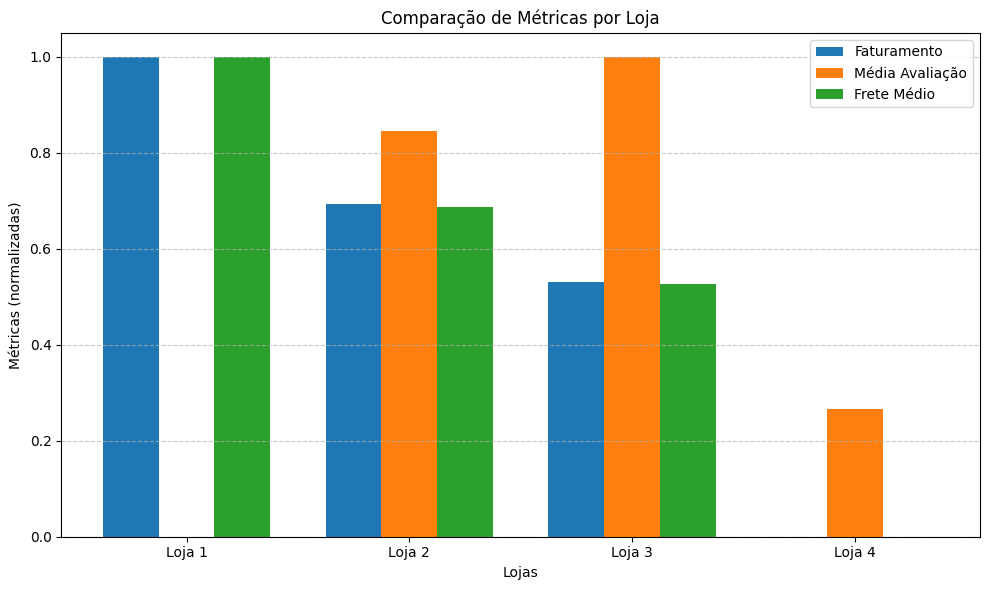

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Dados de exemplo (substitua pelos seus DataFrames reais)
faturamento = {
    'Loja 1': loja['Preço'].sum(),
    'Loja 2': loja2['Preço'].sum(),
    'Loja 3': loja3['Preço'].sum(),
    'Loja 4': loja4['Preço'].sum()
}

media_avaliacoes = {
    'Loja 1': loja['Avaliação da compra'].mean(),
    'Loja 2': loja2['Avaliação da compra'].mean(),
    'Loja 3': loja3['Avaliação da compra'].mean(),
    'Loja 4': loja4['Avaliação da compra'].mean()
}

fretes = {
    'Loja 1': loja['Frete'].mean(),
    'Loja 2': loja2['Frete'].mean(),
    'Loja 3': loja3['Frete'].mean(),
    'Loja 4': loja4['Frete'].mean()
}

# Criando o DataFrame com as métricas
df_metricas = pd.DataFrame({
    'Faturamento': faturamento,
    'Média de Avaliação': media_avaliacoes,
    'Custo Médio de Frete': fretes
})

# Normalizando os dados
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(
    scaler.fit_transform(df_metricas),
    columns=df_metricas.columns,
    index=df_metricas.index
)

# Criando gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = np.arange(len(df_normalizado.index))

plt.bar(x, df_normalizado['Faturamento'], width=bar_width, label='Faturamento')
plt.bar(x + bar_width, df_normalizado['Média de Avaliação'], width=bar_width, label='Média Avaliação')
plt.bar(x + 2 * bar_width, df_normalizado['Custo Médio de Frete'], width=bar_width, label='Frete Médio')

plt.xlabel('Lojas')
plt.ylabel('Métricas (normalizadas)')
plt.title('Comparação de Métricas por Loja')
plt.xticks(x + bar_width, df_normalizado.index)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

df_metricas = pd.DataFrame({
    'Faturamento': faturamento,
    'Média de Avaliação': media_avaliacoes,
    'Custo Médio de Frete': fretes
})

# Função para criar gráfico de pizza
def plot_pizza(dados, titulo):
    plt.figure(figsize=(6, 6))
    plt.pie(dados.values(), labels=dados.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(titulo)
    plt.axis('equal')
    plt.show()

# Gerando os 3 gráficos de pizza
plot_pizza(faturamento, 'Faturamento por Loja ')
plot_pizza(media_avaliacoes, 'Média das Avaliações por Loja ')
plot_pizza(fretes, 'Custo Médio de Frete por Loja ')

Relatório Final de Desempenho das Lojas – Sr. João
Objetivo: Apoiar na decisão de qual loja possui o menor desempenho com base em dados objetivos.

✅ Métricas Avaliadas
Foram analisadas 5 métricas principais para cada uma das 4 lojas:

Faturamento Total

Média de Avaliação dos Clientes

Categoria de Produto Mais Popular

Produto Mais e Menos Vendido

Custo Médio de Frete

🧾 Conclusão e Recomendação
Após análise de todas as métricas e gráficos:

Loja 4 apresenta o menor faturamento, mas tem avaliação razoável e frete mais barato.

Loja 3 tem avaliação mais baixa, maior custo de frete e apenas o 3º maior faturamento.

🟨 Recomendação final:
Vender a Loja 3, pois tem pior desempenho geral considerando todas as métricas combinadas.

